#Arquitectures avançades de xarxes neuronals

Capítol 12 de Python Deep Learning, Jordi Torres

##API funcional

### Model seqüencial

In [ ]:
import tensorflow as tf #afegit
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 784).astype('float32') / 255
x_test = x_test.reshape(10000, 784).astype('float32') / 255

model_base = Sequential()
model_base.add(Dense(64, activation='relu', input_shape=(784,)))
model_base.add(Dense(64, activation='relu'))
model_base.add(Dense(10, activation='softmax'))

model_base.summary() # corregit model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                50240     
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 10)                650       
                                                                 
Total params: 55050 (215.04 KB)
Trainable params: 55050 (215.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


##Model funcional

In [ ]:
from tensorflow import keras

inputs = keras.Input(shape=(784,))

In [ ]:
inputs.shape

TensorShape([None, 784])

In [ ]:
inputs.dtype

tf.float32

In [ ]:
from tensorflow.keras import layers

dense1 = layers.Dense(64, activation ='relu')(inputs)

In [ ]:
dense2 = layers.Dense(64, activation = 'relu')(dense1)
outputs = layers.Dense(10, activation = 'softmax')(dense2)

In [ ]:
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_9 (Dense)             (None, 64)                50240     
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                                 
 dense_11 (Dense)            (None, 10)                650       
                                                                 
Total params: 55050 (215.04 KB)
Trainable params: 55050 (215.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


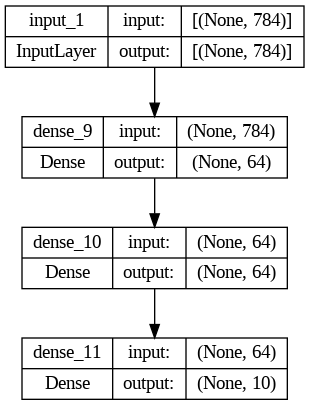

In [ ]:
keras.utils.plot_model(model, 'model.png', show_shapes=True)

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)

model.evaluate(x_test, y_test)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0442 - accuracy: 0.9855
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0363 - accuracy: 0.9879
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0325 - accuracy: 0.9892
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0266 - accuracy: 0.9912
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.1135 - accuracy: 0.9741


[0.11354462802410126, 0.9740999937057495]

##Models complexos

L'API funcional de keras permet construir models complexos molt fàcilment.
Per exemple, el següent codi crea un model compost que calcula el promig de la sortida de tres models elementals.

In [ ]:
def get_model():
  inputs = keras.Input(shape=(128,))
  outputs = layers.Dense(1, activation ='sigmoid')(inputs)
  return keras.Model(inputs, outputs)

model1 = get_model()
model2 = get_model()
model3 = get_model()

inputs = keras.Input(shape=(128,))
y1 = model1(inputs)
y2 = model2(inputs)
y3 = model3(inputs)
outputs = layers.average([y1, y2, y3])
ensemble_model = keras.Model(inputs=inputs, outputs=outputs)

ensemble_model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 128)]                0         []                            
                                                                                                  
 model_1 (Functional)        (None, 1)                    129       ['input_5[0][0]']             
                                                                                                  
 model_2 (Functional)        (None, 1)                    129       ['input_5[0][0]']             
                                                                                                  
 model_3 (Functional)        (None, 1)                    129       ['input_5[0][0]']             
                                                                                            

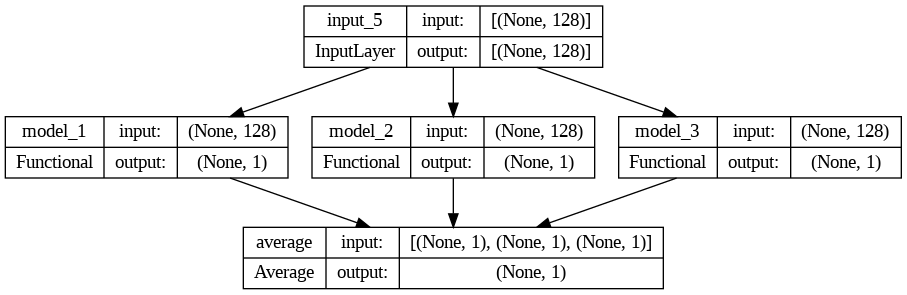

In [ ]:
keras.utils.plot_model(ensemble_model, show_shapes=True)

Un exemple de la web de keras amb capes més complexes que les vistes fins ara.

In [ ]:
num_tags = 12
num_words = 10000
num_departments = 4

title_input = keras.Input(shape=(None,), name='title')
body_input = keras.Input(shape=(None,), name='body')
tags_input = keras.Input(shape=(num_tags,), name='tags')

title_features = layers.Embedding(num_words, 64)(title_input)
body_features = layers.Embedding(num_words, 64)(body_input)

title_features = layers.LSTM(128)(title_features)
body_features = layers.LSTM(32)(body_features)

x = layers.concatenate([title_features, body_features, tags_input])

priority_pred = layers.Dense(1, activation='sigmoid',
                             name='priority')(x)

department_pred = layers.Dense(num_departments, activation='softmax')(x)

model = keras.Model(inputs=[title_input, body_input, tags_input], outputs=[priority_pred, department_pred])

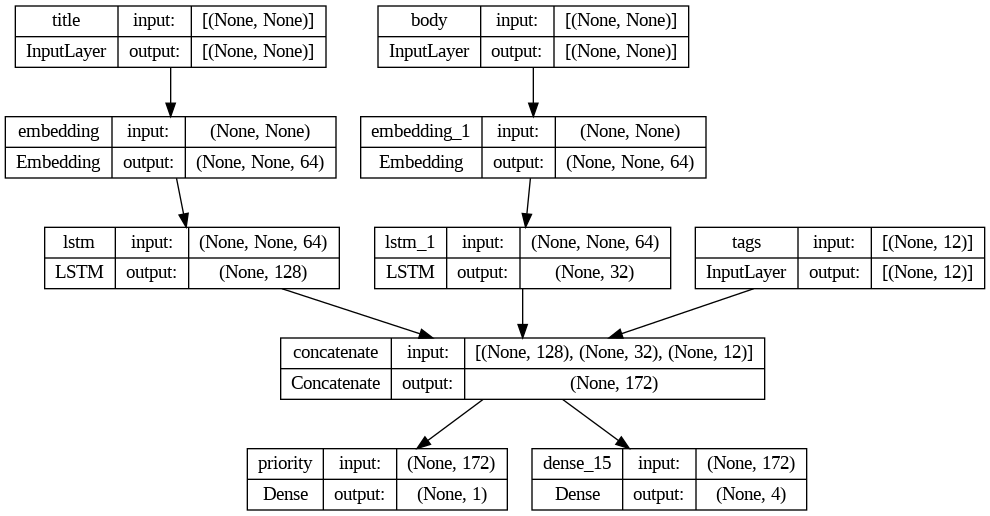

In [ ]:
keras.utils.plot_model(model, 'model.png', show_shapes=True)

##Xarxes neuronals preentrenades

###VGG16

Usant l'API de keras, podem construir una xarxa VGG16 de la forma següent.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D

input_shape = (224, 224, 3)

model = Sequential()
model.add(Conv2D(64, (3,3), input_shape=input_shape, padding='same', activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(512, (3,3), activation='relu', padding='same'))
model.add(Conv2D(512, (3,3), activation='relu', padding='same'))
model.add(Conv2D(512, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(512, (3,3), activation='relu', padding='same'))
model.add(Conv2D(512, (3,3), activation='relu', padding='same'))
model.add(Conv2D(512, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(1000, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_14 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 112, 112, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_16 (Conv2D)          (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 56, 56, 128)       0         
 g2D)                                                 

In [ ]:
from keras.applications import VGG16

model = VGG16(weights='imagenet')

model.summary()

553467096/553467096 [==============================] - 7s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [ ]:
from keras.applications import VGG19

model = VGG19(weights='imagenet')

model.summary()

574710816/574710816 [==============================] - 6s 0us/step
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [ ]:
# Activitat. Implementar la xarxa VGG19 amb el model seqüencial de keras

#Ús de xarxes preentrenades amb **keras**

##Conjunt de dades CIFAR-10

In [ ]:
from tensorflow.keras.datasets.cifar10 import load_data
import matplotlib.pyplot as plt

(train_images, train_labels),(test_images, test_labels) = load_data()
train_images, test_images = train_images/255.0, test_images/255.0

170498071/170498071 [==============================] - 2s 0us/step


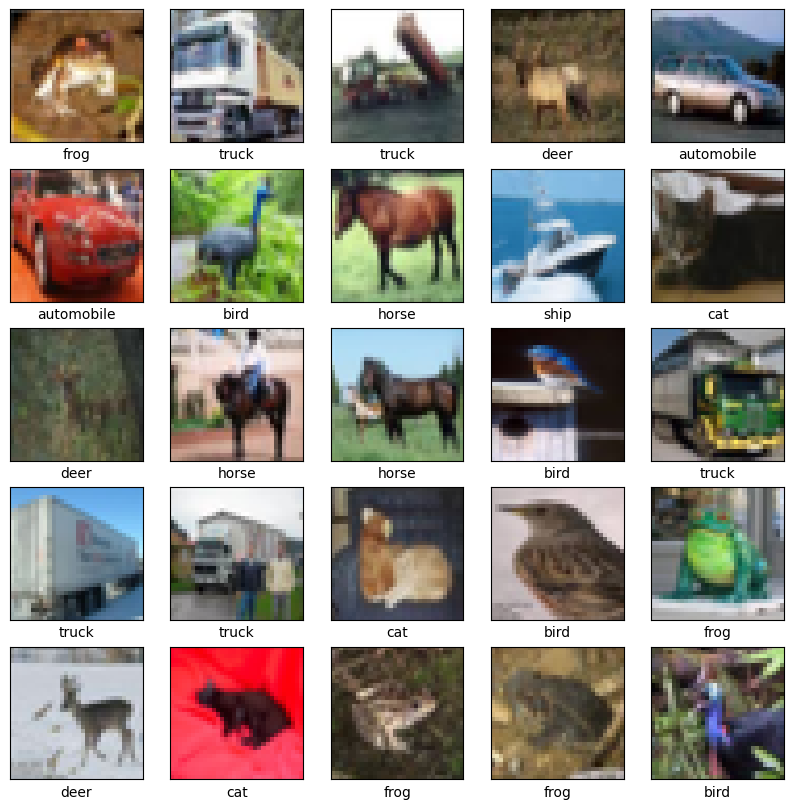

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))

for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)

  plt.xlabel(class_names[train_labels[i][0]])

plt.show()

##Xarxa neuronal ResNet50

In [ ]:
modelresnet50v2 = tf.keras.applications.ResNet50V2(include_top=True, weights=None, input_shape=(32,32,3), classes=10)

opt = tf.keras.optimizers.SGD(0.002)

modelresnet50v2.compile(loss='sparse_categorical_crossentropy',optimizer=opt, metrics=['accuracy'])

history = modelresnet50v2.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

In [ ]:
modelresnet50v2pre = tf.keras.Sequential()

modelresnet50v2pre.add(tf.keras.applications.ResNet50V2(include_top=False, weights='imagenet', pooling='avg', input_shape=(32,32,3)))

modelresnet50v2pre.add(layers.Dense(10, activation='softmax'))

opt = tf.keras.optimizers.SGD(0.002)

modelresnet50v2pre.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

##Xarxa neuronal VGG19

In [ ]:
model = tf.keras.Sequential()

model.add(tf.keras.applications.VGG19(include_top=False, weights='imagenet', pooling='avg', input_shape=(32,32,3))

model.add(layers.Dense(10,activation='softmax'))

opt = tf.keras.optimizers.SGD(0.002)

model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))